# World Life Expectancy - SQL Project

This project analyzes global life expectancy data using SQL.  
The aim is to explore how health and economic factors influence life expectancy across countries from 2000 to 2015.  
Data was cleaned, missing values handled, and queries were written to calculate averages, detect trends, and compare countries by status (developed vs. developing).  
The analysis highlights key differences in life expectancy and reveals regions with notable improvements over time.

## Table of Contents
1. [Data Preview](#data-preview)
2. [Cleaning Data](#cleaning-data)
   - [2.1 Duplicates](#duplicates)
   - [2.2 Missing Values](#missing-values)
3. [Analysis](#analysis)
4. [Conclusions](#conclusions)


## 1. Quick look at the data <a id="overview"></a>
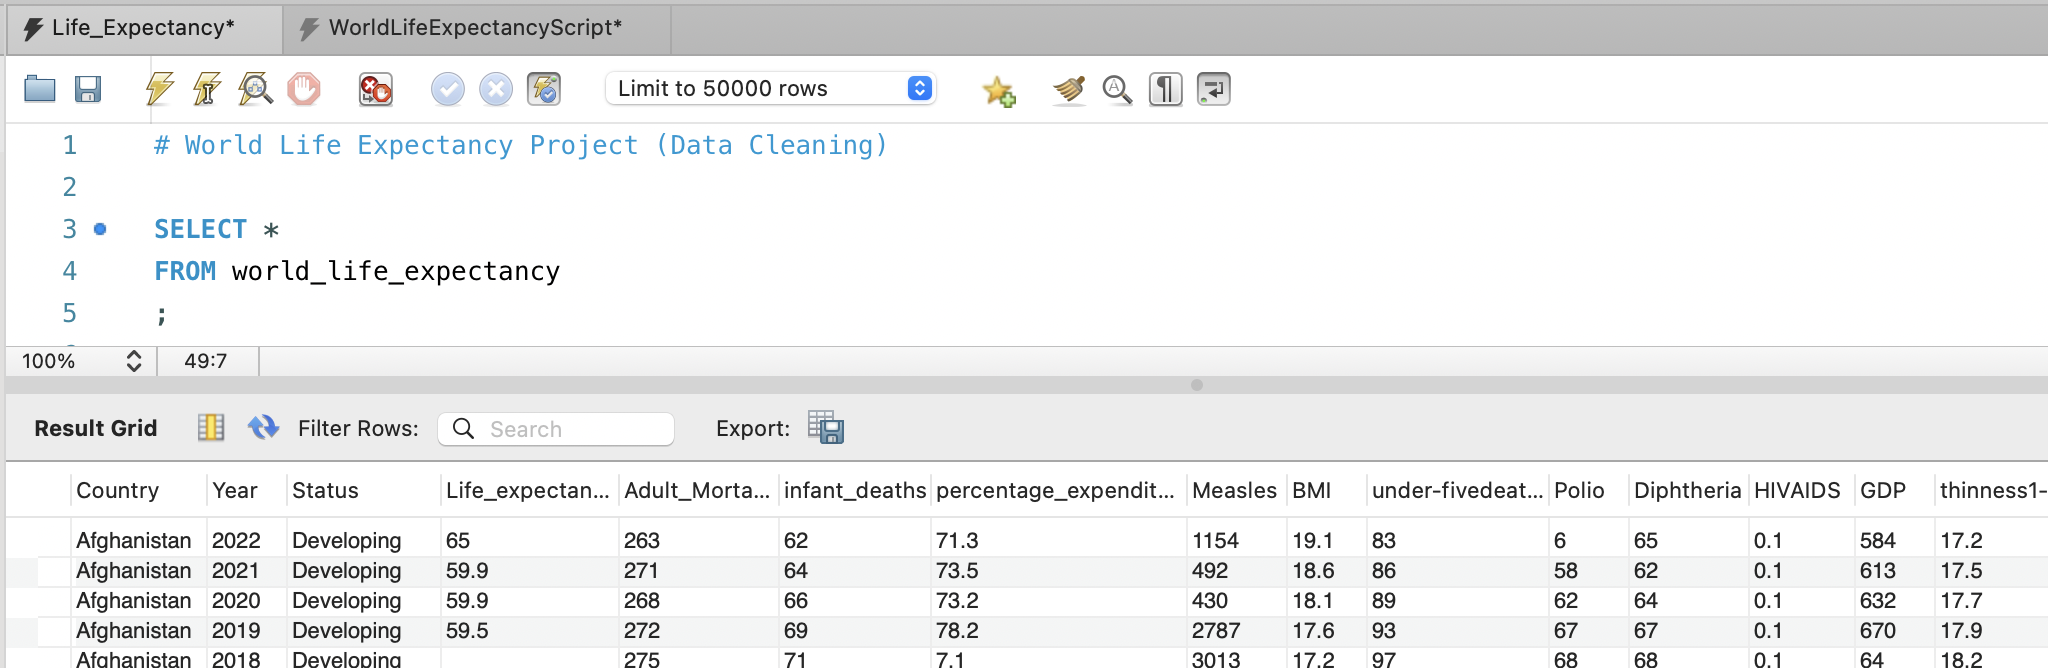

## 2. Cleaning Data <a id="cleaning-data"></a>

### 2.1 Duplicates <a id="duplicates"></a>
Each country should have 1 record per year, hence each country-year pair should appear only once in the dataset.     
**Steps I will take:**
- Identify duplicates  
- Create a backup and delete them  
- Verify the results
  
**Identifying**  
I began by checking for duplicate combinations using a `COUNT(*)` aggregation.

<img src="cleaning_img_1.jpeg" alt="Cleaning Data Screenshot" width="900">

>output:

<img src="cleaning_img_2.jpeg" alt="Cleaning Data Screenshot" width="1000">
3 countries have double records of a certain year.

**Deleting (after creating backup table)**  
After identifying that 3 countries had duplicate year records, I used a subquery with a `ROW_NUMBER()` window function to remove the extra rows, identified by their Row_ID:

<img src="cleaning_img_5.jpeg" alt="Cleaning Data Screenshot" width="1000">

**Verification Step**  
After deletion, I re-ran a check to confirm each country has only one record per year.
<img src="cleaning_img_6.jpeg" alt="Cleaning Data Screenshot" width="900">
No rows were returned, confirming duplicates were removed successfully.

### 2.2 Handling Missing Values <a id="missing-values"></a>
First, I filled in the missing values in the **Status** column.   
I noticed that each country only has one status; either Developed or Developing.   
So if a country had a missing value, I could safely fill it in based on its known status.

#### Recognize missing values:
<img src="cleaning_img_7.jpeg" alt="Cleaning Data Screenshot" width="900">

#### Checking all possible values:

<img src="cleaning_img_8.jpeg" alt="Cleaning Data Screenshot" width="700">

#### Checking each country has only one status:
This query counts distinct Status values (Developed or Developing) for each country where the status is not null, helping verify that every country is classified as only one (not counting missing values).

<img src="cleaning_img_9.jpeg" alt="Cleaning Data Screenshot" width="900">

#### 

2. Fill the life expectancy - MAYBE LATER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv_name = "WorldLifeExpectancy.csv"
# Load csv
df = pd.read_csv(csv_name)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Schooling,Row_ID
0,Afghanistan,2022,Developing,65.0,263,62,71.3,1154,19.1,83,6,65,0.1,584,17.2,17.3,10.1,1
1,Afghanistan,2021,Developing,59.9,271,64,73.5,492,18.6,86,58,62,0.1,613,17.5,17.5,10.0,2
2,Afghanistan,2020,Developing,59.9,268,66,73.2,430,18.1,89,62,64,0.1,632,17.7,17.7,9.9,3
3,Afghanistan,2019,Developing,59.5,272,69,78.2,2787,17.6,93,67,67,0.1,670,17.9,18.0,9.8,4
4,Afghanistan,2018,Developing,NaN,275,71,7.1,3013,17.2,97,68,68,0.1,64,18.2,18.2,9.5,5


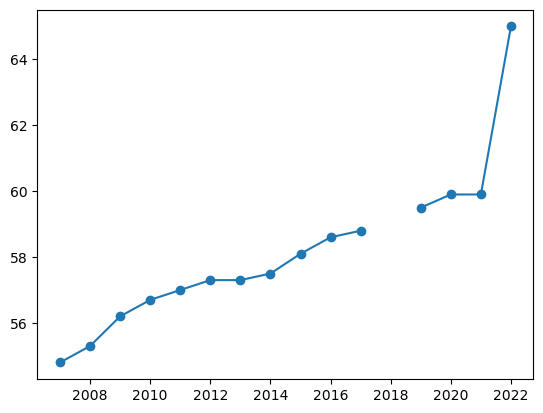

In [9]:
plt.plot(
    df.loc[df['Country'] == 'Afghanistan', 'Year'],
    df.loc[df['Country'] == 'Afghanistan', 'Life expectancy '],
    marker='o'
)
plt.show()

In [7]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'percentage expenditure', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling', 'Row_ID'],
      dtype='object')


In [ ]:
cvs_name = "WorldLifeExpectancy.csv"
# 1️⃣ Load the CSV
df = pd.read_csv('world_life_expectancy.csv')

# 2️⃣ Filter for Afghanistan and Albania
countries = ['Afghanistan', 'Albania']
subset = df[df['Country'].isin(countries)]

# 3️⃣ Plot life expectancy by year
plt.figure(figsize=(10, 6))
for country in countries:
    temp = subset[subset['Country'] == country]
    plt.plot(temp['Year'], temp['Life_expectancy'], marker='o', label=country)

# 4️⃣ Expert-style formatting
plt.title('Life Expectancy by Year (Afghanistan vs. Albania)', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', loc='best')
plt.tight_layout()
plt.show()